# Customer Churn Analysis

This notebook performs an end-to-end churn analysis with reproducible chart saving for portfolio use.

In [21]:
import os
import matplotlib.pyplot as plt


# Path to save charts
CHART_PATH = "../charts"
os.makedirs(CHART_PATH, exist_ok=True)


# Customer Churn Analysis

This notebook analyzes customer churn patterns to identify key drivers and provide actionable business insights.

## 1. Business Problem & Objective

The objective is to understand which customer segments are more likely to churn and identify factors driving churn so that retention strategies can be designed.

In [22]:
import pandas as pd
import numpy as np

In [23]:
df = pd.read_csv('../data/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [24]:
df['Churn'].value_counts(normalize=True)

Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64

In [25]:
df['tenure'].min(), df['tenure'].max()

(0, 72)

In [26]:
df.groupby('Churn')['tenure'].mean()

Churn
No     37.569965
Yes    17.979133
Name: tenure, dtype: float64

In [27]:
df.groupby('Churn')['MonthlyCharges'].mean()

Churn
No     61.265124
Yes    74.441332
Name: MonthlyCharges, dtype: float64

In [28]:
pd.crosstab(df['Contract'], df['Churn'])

Churn,No,Yes
Contract,,
Month-to-month,2220,1655
One year,1307,166
Two year,1647,48


In [29]:
pd.crosstab(df['InternetService'], df['Churn'])

Churn,No,Yes
InternetService,,
DSL,1962,459
Fiber optic,1799,1297
No,1413,113


In [30]:
pd.crosstab(df['PaymentMethod'], df['Churn'])

Churn,No,Yes
PaymentMethod,,
Bank transfer (automatic),1286,258
Credit card (automatic),1290,232
Electronic check,1294,1071
Mailed check,1304,308


In [31]:
df['TotalCharges'].isnull().sum()

np.int64(0)

In [32]:
(df['TotalCharges'] == ' ').sum()

np.int64(11)

In [33]:
df['TotalCharges'] = df['TotalCharges'].replace(' ', np.nan)

In [34]:
df['TotalCharges'].isnull().sum()

np.int64(11)

In [35]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])

In [36]:
df[df['tenure'] == 0][['tenure', 'TotalCharges', 'Churn']].head()

,tenure,TotalCharges,Churn
488,0,NaN,No
753,0,NaN,No
936,0,NaN,No
1082,0,NaN,No
1340,0,NaN,No


In [37]:
pd.crosstab(df['SeniorCitizen'], df['Churn'])

Churn,No,Yes
SeniorCitizen,,
0,4508,1393
1,666,476


In [38]:
pd.crosstab(df['Partner'], df['Churn'])

Churn,No,Yes
Partner,,
No,2441,1200
Yes,2733,669


In [39]:
pd.crosstab(df['Dependents'], df['Churn'])

Churn,No,Yes
Dependents,,
No,3390,1543
Yes,1784,326


In [40]:
import matplotlib.pyplot as plt

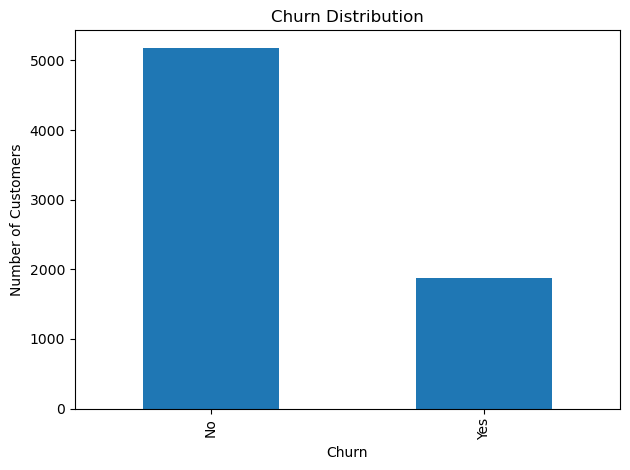

In [41]:
df['Churn'].value_counts().plot(kind='bar')
plt.title('Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Number of Customers')
plt.tight_layout()
plt.savefig(f"{CHART_PATH}/chart_1.png", dpi=300)
plt.show()

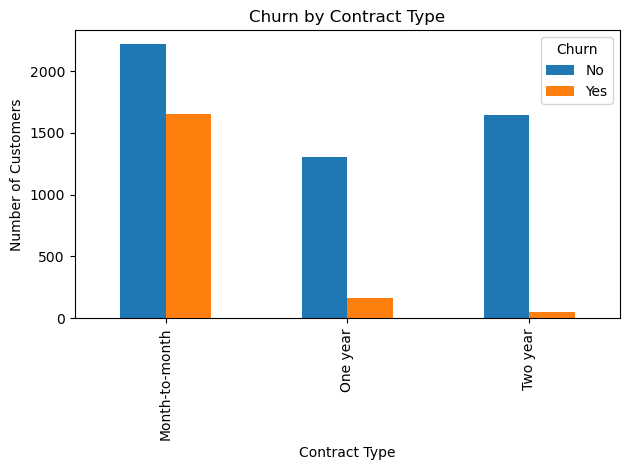

In [42]:
pd.crosstab(df['Contract'], df['Churn']).plot(kind='bar')
plt.title('Churn by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Number of Customers')
plt.tight_layout()
plt.savefig(f"{CHART_PATH}/chart_2.png", dpi=300)
plt.show()

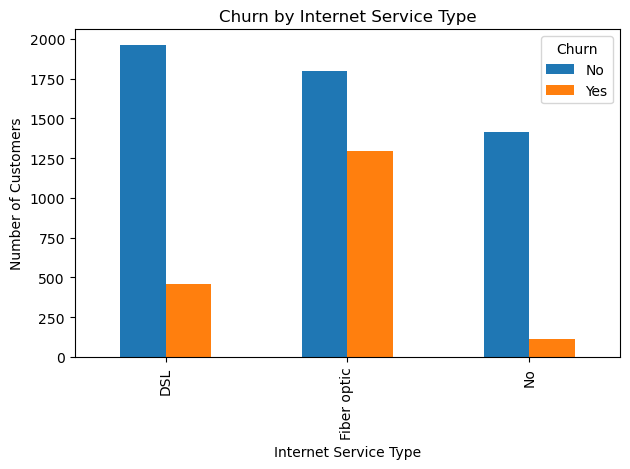

In [43]:
pd.crosstab(df['InternetService'], df['Churn']).plot(kind='bar')
plt.title('Churn by Internet Service Type')
plt.xlabel('Internet Service Type')
plt.ylabel('Number of Customers')
plt.tight_layout()
plt.savefig(f"{CHART_PATH}/chart_3.png", dpi=300)
plt.show()

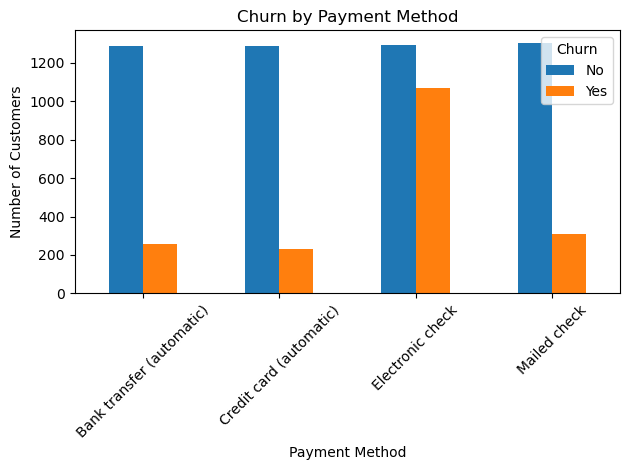

In [44]:
pd.crosstab(df['PaymentMethod'], df['Churn']).plot(kind='bar')
plt.title('Churn by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(f"{CHART_PATH}/chart_4.png", dpi=300)
plt.show()

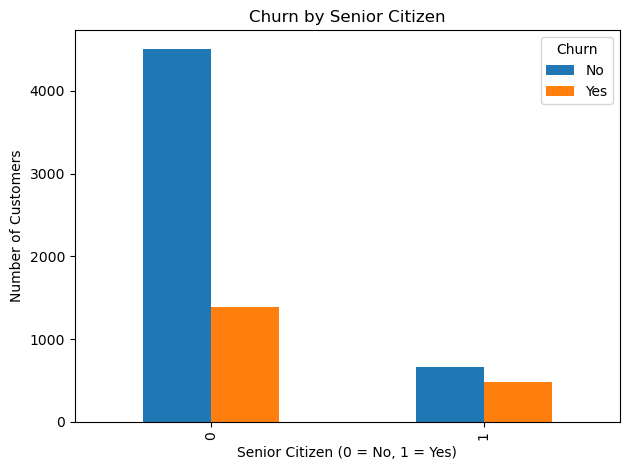

In [45]:
pd.crosstab(df['SeniorCitizen'], df['Churn']).plot(kind='bar')
plt.title('Churn by Senior Citizen')
plt.xlabel('Senior Citizen (0 = No, 1 = Yes)')
plt.ylabel('Number of Customers')
plt.tight_layout()
plt.savefig(f"{CHART_PATH}/chart_5.png", dpi=300)
plt.show()

In [46]:
df.to_csv('../data/telco_churn_cleaned.csv', index=False)

## Key Insights
- Month-to-month contract customers show the highest churn.
- Fiber optic users churn more than DSL users.
- Short-tenure customers are at highest risk.
- Customers without partners or dependents churn more.

## Business Recommendations
- Promote long-term contracts with discounts.
- Improve fiber optic service quality.
- Introduce onboarding retention programs for new customers.
- Offer loyalty benefits for single customers.